# Principal Component Analysis (PCA)
## The motto in PCA is LESS IS MORE
### Dimensionality Reduction
As we all now, that we have experienced with the last decade, a explosion in the number of data records. 
### We live in the information age, we have data on almost everything [Rogel]!
The richness of the available data can help us to make better decisions but on the other hand the sheer number of the available features can be overwhelming. Sometimes even to the point that is difficult to determine what attributes are the most important ones [Rogel].

PCA is a way of reducing the number of features in a dataset by generating combinations of the attributes with the purpose of projecting into a lower dimensional space while maintaining as much as information as possible [Rogel, Handl].

* PCA is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.
* PCA is looking to preserv the maximum amount of variance as possible.
* We will be loosing some information, if we preserve $95 \%$ of the variance, then $5 \%$ of the information will be lost.
* The so called principal components are special mathematical objects of variance-covariance matrix of the data set inquestion.
* These are the eigenvectors corresponding to their eigenvalues of the variance-covariance matrix.

### Some examples of calculating Eigenvalues and Eigenvectors will be presented at the lecture.

Is there a number $\lambda$ such that a multiplication $\lambda \vec{x}$
gives us the same result as $\mathbf{A}\vec{x}$.
$$
\mathbf{A}\vec{x}=\lambda \vec{x}
$$
I such a number exists, then $\lambda$ is an eigenvalue of the matrix $\mathbf{A}$ and $\vec{x}$ is one of its eigenvectors.

$$
\mathbf{A}\vec{x} - \lambda \vec{x} = 0
$$
$$
(\mathbf{A} - \lambda \mathbf{\mathbb{1}} ) \vec{x} = 0
$$
$$
|\mathbf{A} - \lambda \mathbf{\mathbb{1}} | = 0
$$
The determinant of $(\mathbf{A} - \lambda \mathbf{\mathbb{1}} )$. <br>
Then one gets the eigenvalues, and for each eigenvalue we can solve
$$
\mathbf{A}\vec{x} - \lambda \vec{x} = 0
$$
to get the corresponding eingenvectors.

1. Find the eigenvalues and eigenvectors of the following matrix
$$
\mathbf{A}=\begin{pmatrix} 1 & 2 \\ 2 & 1 \end{pmatrix}
$$
2. Find the eigenvalues and eigenvectors of the following matrix
$$
\mathbf{A}=\begin{pmatrix} 3 & 4 \\ 4 & -3 \end{pmatrix}
$$

We will do this by hand first and then with python and numpy. This is the core idea behind PCA!!!!

In [1]:
import numpy as np
from numpy import linalg as la

A=np.matrix([[1,2],[2,1]])
w,v=la.eig(A)

print("the eigenvalues are:\n",w)

print("the eigenvektors are:\n",v)

the eigenvalues are:
 [ 3. -1.]
the eigenvektors are:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [2]:
A@v[:,1]

matrix([[ 0.70710678],
        [-0.70710678]])

In [3]:
import numpy as np
from numpy import linalg as la
A=np.matrix([[3,4],[4,-3]])
w,v=la.eig(A)
print("the eigenvalues are:\n",w)
print("the eigenvektors are:\n",v)

the eigenvalues are:
 [ 5. -5.]
the eigenvektors are:
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [4]:
A=np.matrix([[3,4,1],[4,-3,2], [2,1,3]])
A

matrix([[ 3,  4,  1],
        [ 4, -3,  2],
        [ 2,  1,  3]])

In [5]:
w,v=la.eig(A)
print("the eigenvalues are:\n",w)
print("the eigenvektors are:\n",v)

the eigenvalues are:
 [-5.          6.23606798  1.76393202]
the eigenvektors are:
 [[ 4.47213595e-01 -7.03871120e-01 -5.02828595e-01]
 [-8.94427191e-01 -4.27651717e-01 -6.01894251e-02]
 [-3.55841768e-17 -5.67167924e-01  8.62288025e-01]]


### In PCA we want to find a representation of the data with a dimension less then dimension of $N$ features of the datamatrix.
It makes use of an orthonal transformation to take the original $N$ coordinates of our dataset into a new coordinate system known as the principal components.<br>
The principal components are ranked, with the first principal component accounting for the largest contribution to the variance. <br>
The transformation is orthogonal, so each of the components are uncorrelated to each other. This is because  the principal components are eigenvectors of the covariance matrix.<br>
The dimension reduction comes when we are representing the data only with those principal components which provide the highest contribution to the variance of the dataset.

## Let's try some PCA analysis for image compression

the size of the matrix (array is) (252, 257, 4)


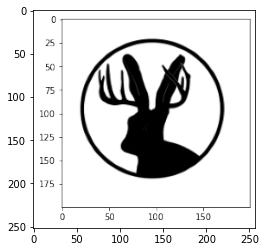

In [6]:
import numpy as np
import matplotlib.pylab as plt

A=plt.imread(r'jackalope.png')

print("the size of the matrix (array is)",np.shape(A))

plt.imshow(A)
plt.show()

This image has size $252 \times 257$ pixels, arranged in four stacked arrays. The first three arrays corresponds to R,G,B and the fourth is the so called transparency. But our image is black and white.
So we dont need all the entries for R,G,B.

We will work with a single array made out of the mean of the four arrays provided!

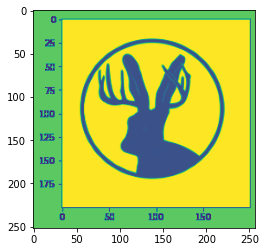

In [7]:
# calling the compressed array X ... we compressed R,G,B and transparency into one value, by cumulation over the
# third array dimension, 0, 1, 2 !
X=np.mean(A,axis=2)

plt.imshow(X)
plt.show()

In [8]:
# explore the data matrix a bit
print(np.shape(X))
X[130:150,140:160]

(252, 257)


array([[0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.29411766, 0.9705882 , 0.9970588 ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.27941176, 0.54019606, 0.9941176 , 0.9970588 ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.30784315, 0.7764706 , 0.9941176 , 0.9970588 ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.2529412 , 0.33431372, 0.8843137 , 0

In [9]:
X[100:200,10:15]

array([[0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.75      , 0.75      , 0.75      ],
       [0.75      , 0.75      , 0.

### The PCA decomposition can be carried out with the implementation in the decomposition module in Scikit-learn

(252, 5)
(252, 257)


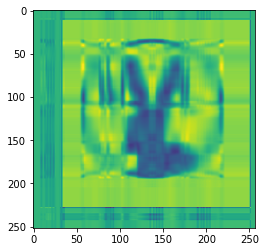

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)           # von 200 auf 5 Spalten runter
X_reduced = pca.fit_transform(X)    # berechnet die 5 Hauptkomponenten

X_recovered = pca.inverse_transform(X_reduced)    # transforms the data back to

print(np.shape(X_reduced))                        # its original space but only  
print(np.shape(X_recovered))                      # with the the n_components, PC

plt.imshow(X_recovered)                           

In [11]:
pca.components_.T[0:10,0:5]    # this is the first principal component .

array([[-1.63912773e-07,  2.38418579e-07,  1.78813934e-07,
         1.19209290e-07,  2.42143869e-08],
       [-3.57627869e-07,  2.08616257e-07, -3.09199095e-07,
        -1.93715096e-07, -5.86733222e-08],
       [-2.98023224e-07, -5.06639481e-07,  8.94069672e-08,
         2.08616257e-07,  3.48518370e-08],
       [ 5.96046448e-08,  1.78813934e-07, -2.68220901e-07,
        -0.00000000e+00,  1.49011612e-08],
       [ 3.72529030e-09,  4.47034836e-08, -1.78813934e-07,
         2.38418579e-07, -2.42143869e-08],
       [ 4.65661287e-10,  1.49011612e-08, -1.19209290e-07,
         2.98023224e-07,  7.45058060e-09],
       [ 0.00000000e+00, -9.31322575e-10, -1.49011612e-08,
        -5.96046448e-08, -1.21071935e-08],
       [ 0.00000000e+00,  2.32830644e-10, -1.86264515e-09,
         7.45058060e-09,  1.04308128e-07],
       [-3.14979581e-03,  1.80177763e-02, -5.08768810e-03,
         1.54240970e-02,  1.31216645e-02],
       [-8.96892790e-03,  5.07480018e-02, -1.31737515e-02,
         4.13969234e-02

### Explained Variance Ratio
Another very useful piece of information is the explained variance ratio of each principal component,
available via the **explained_variance_ratio_** variable. It indicates the proportion of the dataset’s
variance that lies along the axis of each principal component.

In [12]:
pca.explained_variance_ratio_

array([0.29670307, 0.15134192, 0.09624451, 0.08162504, 0.06914248],
      dtype=float32)

This tells you that 33.8% of the dataset’s variance lies along the first axis, and 16.9% lies along the
second axis, 10.1% along the third axis and so on . About 60% percent of the total varaince is in the first 5 principal components.

### Choosing the Right Number of Dimensions
Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to
choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).
Unless, of course, you are reducing dimensionality for data visualization — in that case you will
generally want to reduce the dimensionality down to 2 or 3.

instead of choosing different dimensions d or specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0 , indicating the ratio of variance you wish to preserve:

(252, 21)
(252, 257)


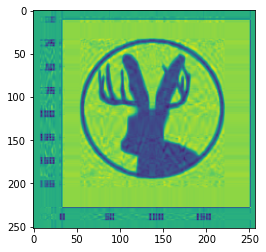

In [13]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

X_recovered = pca.inverse_transform(X_reduced)    # transforms the data back to

print(np.shape(X_reduced))                        # its original space but only  
print(np.shape(X_recovered))                      # with the the n_components, PC

plt.imshow(X_recovered)                           

In [14]:
pca.explained_variance_ratio_

array([0.29670307, 0.15134192, 0.09624451, 0.08162504, 0.06914248,
       0.0446853 , 0.03540841, 0.02813016, 0.02452627, 0.01819184,
       0.01716482, 0.01565297, 0.01461981, 0.01226624, 0.01008649,
       0.008344  , 0.00726786, 0.00534224, 0.00488666, 0.00470914,
       0.00370423], dtype=float32)

#### Exercise
Compress the image ocean.png, so that 95% of the variance is preserved.
+ How many PC do you have?

the size of the matrix (array is) (252, 266, 4)


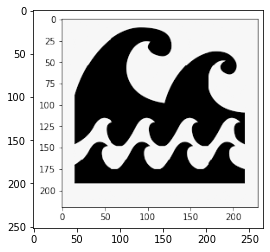

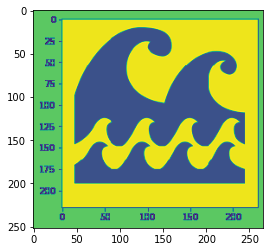

In [15]:
A=plt.imread(r'ocean.png')

print("the size of the matrix (array is)",np.shape(A))

plt.imshow(A)
plt.show()

X=np.mean(A,axis=2)

plt.imshow(X)
plt.show()

(252, 21)
(252, 266)


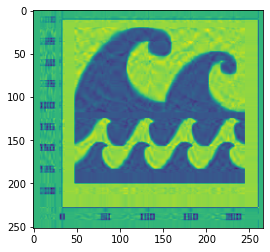

In [16]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

X_recovered = pca.inverse_transform(X_reduced)    # transforms the data back to

print(np.shape(X_reduced))                        # its original space but only  
print(np.shape(X_recovered))                      # with the the n_components, PC

plt.imshow(X_recovered)    

In [17]:
pca.explained_variance_ratio_

array([0.386657  , 0.1521353 , 0.12365311, 0.0668256 , 0.05339463,
       0.04070074, 0.02124011, 0.02018332, 0.01581289, 0.01253806,
       0.01034147, 0.00891897, 0.00706359, 0.00623606, 0.00534036,
       0.00444731, 0.00403447, 0.00367502, 0.00341709, 0.00289817,
       0.00285724], dtype=float32)

### Now we will do a PCA analysis by foot!

### Imagine we have a dataset consisting of d variables, and these are measured n times. This gives a datamatrix of n x d dimensions.
$$
\vec{x_{1}}, \vec{x_{2}}, \dots \vec{x_{d}}
$$
How can we reduce the amount of data? <br>
We want to choose the variables which contain the most information.
### One way to do this, is to choose the variables with the most varianz.
But if you just use these for further analysis, you loose the information contained in the other variables.
### Thats we are looking for a linearcombination of all the $d$ variables with the highest standard deviation. 
This is known as the PCA.
### To get a better feeling for PCA, we are doing the analysis with just two variables.
$$
\vec{x_{1}}, \vec{x_{2}}
$$
### We are looking for two real numbers $a_{1}$ and $a_{2}$, which maximizes the varianz of the linear combination
$$
a_{1}\vec{x_{1}} + a_{2}\vec{x_{2}}
$$
This problem has no solution without an additional constraint:
$$
a_{1}^{2} + a_{2}^{2}=1
$$

[0.33800187 0.33890955 0.79322902 0.80298862 0.56936063 1.06706015
 0.65809449 0.72036424 1.40761439 1.3405488  1.27211147 1.18198184
 1.74658275 1.52632736 1.94741662 2.24223637 2.28956969 2.33913028
 2.00605263 2.16886859 2.30840055 2.27239091 3.11451935 2.6139315
 3.413486   3.4941012  3.19036004 3.14276884 3.26544099 3.5569658
 3.8238307  3.95965111 3.27955159 3.45814682 4.30298997 4.46853311
 4.23973892 3.80726385 4.06126121 4.5580761  4.11442985 4.97677344
 4.51405575 4.95485142 5.43003814 5.50634742 5.01475718 5.61322048
 5.75914832 5.75816545] [2.23114257 2.0949559  2.5429004  2.6602332  2.10604058 2.95048704
 2.65809823 2.18050652 3.00766538 3.11117637 2.95770907 2.24208641
 2.77097841 2.87960045 3.02087486 2.52037582 3.15310297 2.73162172
 3.08923975 3.25373488 2.40587478 2.98807813 3.21748236 2.74885788
 3.36865139 2.60584206 2.61077018 3.52319792 3.04837211 3.39742678
 3.54910117 3.20626548 3.4495372  3.40863931 3.4899428  3.41712885
 2.94202697 3.18657655 3.29284858 3.6696

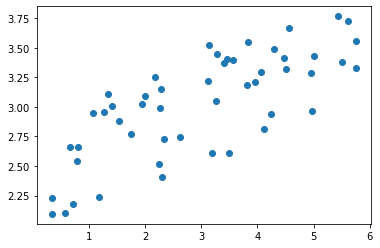

In [18]:
import numpy as np
import numpy.linalg as la
import matplotlib.pylab as plt
import random as r

x=np.linspace(start = 0, stop = 10, num = 100)
y=2+0.2*x
x1=np.zeros(50,float)
x2=np.zeros(50,float)
for i in range(50):
    x1[i]=x[i]+r.random()
    x2[i]=y[i]+r.random()

print(x1,x2)    
    
plt.scatter(x1,x2)

In [19]:
import pandas as pd

df=pd.DataFrame({'col1': x1,'col2': x2})
print(df)
C=np.cov(df.T)
print('Cov(x1,x2)=\n',C)

        col1      col2
0   0.338002  2.231143
1   0.338910  2.094956
2   0.793229  2.542900
3   0.802989  2.660233
4   0.569361  2.106041
5   1.067060  2.950487
6   0.658094  2.658098
7   0.720364  2.180507
8   1.407614  3.007665
9   1.340549  3.111176
10  1.272111  2.957709
11  1.181982  2.242086
12  1.746583  2.770978
13  1.526327  2.879600
14  1.947417  3.020875
15  2.242236  2.520376
16  2.289570  3.153103
17  2.339130  2.731622
18  2.006053  3.089240
19  2.168869  3.253735
20  2.308401  2.405875
21  2.272391  2.988078
22  3.114519  3.217482
23  2.613931  2.748858
24  3.413486  3.368651
25  3.494101  2.605842
26  3.190360  2.610770
27  3.142769  3.523198
28  3.265441  3.048372
29  3.556966  3.397427
30  3.823831  3.549101
31  3.959651  3.206265
32  3.279552  3.449537
33  3.458147  3.408639
34  4.302990  3.489943
35  4.468533  3.417129
36  4.239739  2.942027
37  3.807264  3.186577
38  4.061261  3.292849
39  4.558076  3.669647
40  4.114430  2.813902
41  4.976773  2.963308
42  4.51405

In [20]:
e,E=la.eig(C)
print('Eigenvalues=\n',e)

Eigenvalues=
 [2.70234173 0.0795231 ]


In [21]:
print('Eigenvektors=\n',E)

Eigenvektors=
 [[ 0.97810503 -0.20811188]
 [ 0.20811188  0.97810503]]


[0.79492859 0.76747433 1.30506907 1.33903333 0.99518655 1.65772829
 1.19686734 1.15838118 2.00272559 1.95867027 1.85979301 1.62270719
 2.28501488 2.09218752 2.53345792 2.71766281 2.8956378  2.85639801
 2.60503764 2.79852214 2.7585493  2.84449152 3.71592333 3.12876951
 4.03980418 3.95990463 3.66383948 3.80717733 3.82834669 4.186131
 4.47871814 4.54021658 3.92563555 4.09180911 4.93507467 5.0818398
 4.75918071 4.38706834 4.65762091 5.2219743  4.60995089 5.48450662
 5.10602263 5.5306233  6.09491502 6.08953338 5.61962881 6.26501107
 6.32497507 6.37168755]


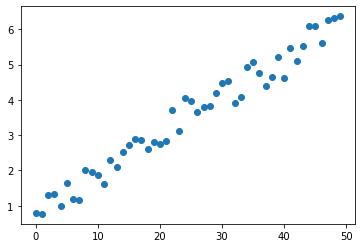

In [22]:
PC=E[0,0]*x1+E[1,0]*x2
print(PC)
plt.plot(PC,'o')

In [23]:
pca = PCA(n_components=1)
#print(pca.fit(df))
PC1 = pca.fit_transform(df)
PC2 = pca.inverse_transform(PC1)

print("PCA comp:", pca.components_)

print("Explained variance ratio:", pca.explained_variance_ratio_)

PCA comp: [[0.97810503 0.20811188]]
Explained variance ratio: [0.97141375]


# References
1. [pandas] W. McKinney, Data Structures for Statistical Computing in Python, in Proceedings of the 9th Python in Science Conference, edited by S. van der Walt and J. Millman, pp. 51 – 56, 2010.
2. [McKinney] W. McKinney, Datenanalyse mit Python, O'Reilly, 2015
3. [Grus] J. Grus, Einführung in Data Science, O'Reilly, 2016
4. [Rogel] Data Science and Analytics with PYthon, CRC Press LLC, 2017
5. [Handl] Multivariate Analysemethoden, Springer, 2002